# Disease Prediction 2 datasets

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler # importing StandardScaler

# using GridSearchCV to find the best parameters for the models

from sklearn.model_selection import GridSearchCV # importing GridSearchCV

# Importing chosen models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# importing the train_test_split and val function
from sklearn.model_selection import train_test_split

# importing the accuracy_score function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, recall_score, precision_score


# importing VotingClassifier
from sklearn.ensemble import VotingClassifier

In [592]:
# Importing datasets


df_0 = pd.read_csv("../Data/df_0_with_dummy_encoding.csv", index_col=0)
df_1 = pd.read_csv("../Data/df_1_with_dummy_encoding.csv", index_col=0)


## Selecting Models:

### I chose:
- Logistic Regression for its ease of implementation, 
- Random Forest for its ability to handle non-linear relationships and handle large datasets, 
- KNN for its simplicity and effectiveness with small datasets
- Gaussian Naive Bayes for its strong performance on high-dimensional data and fast training time. By evaluating the strengths of each model, I can select the best one for my specific use case.

In [593]:
# Setting the models as objects

log_reg = LogisticRegression() # creating a LogisticRegression object
rf = RandomForestClassifier() # creating a RandomForestClassifier object
knn = KNeighborsClassifier() # creating a KNeighborsClassifier object
gauss_nb = GaussianNB()     # creating a GaussianNB object

In [594]:
# Creating a function to fit the model easier in the loop
def func_fit(model, X_train,y_train,): # defining the function
    model.fit(X_train, y_train) # fitting the model



# function to print the accuracy score, confusion matrix and classification report and plotting the confusion matrix
def print_metrics(model, y_val, y_pred):
    print("Accuracy score: ", accuracy_score(y_val, y_pred)) # printing the accuracy score
    print("Confusion matrix: ", confusion_matrix(y_val, y_pred)) # printing the confusion matrix
    print("Classification report: ", classification_report(y_val, y_pred)) # printing the classification report
    print("F1-score: ", f1_score(y_val, y_pred)) # printing the f1-score
    print("Model: ", model) # printing the model
    plt.show() # showing the plot


# creating a function to find the best parameters for the models
def find_best_params(model, params, X_train, y_train): 
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=2) # creating a GridSearchCV object, params is the parameters to try, cv is the number of folds, n_jobs is the number of jobs to run in parallel, verbose is the verbosity level
    grid_search.fit(X_train, y_train) # fitting the model
    print("Model", model) #printing the model
    print("Best parameters: ", grid_search.best_params_) # printing the best parameters
    print("Best score: ", grid_search.best_score_) # printing the best score
    return grid_search.best_params_ # returning the best parameters

# creating a train and test split function that uses the best parameter
def train_and_test_with_best_params(model, X_train, X_val, y_train, y_val, best_params):
    model.set_params(**best_params) # setting the best parameters
    model.fit(X_train, y_train) # training the model
    y_pred = model.predict(X_val) # predicting the test set
     # printing the metrics

# creating a function that plots the confusion matrix for the models with the best parameters 
def plot_confusion_matrix(model, X_val, y_val):
    y_pred = model.predict(X_val) # predicting the test set
    cm = confusion_matrix(y_val, y_pred) # creating a confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # creating a ConfusionMatrixDisplay object
    disp.plot() # plotting the confusion matrix

## Splitting the datasets into Train|Val|Test

In [595]:
X_0, y_0 = df_0.drop("cardio", axis=1), df_0["cardio"]
X_1, y_1 = df_1.drop("cardio", axis=1), df_1["cardio"]


# Splitting X and y into train, validation and test sets
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.33, random_state=42)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state=42)

X_0_train, X_0_val, y_0_train, y_0_val = train_test_split(X_0_train, y_0_train, test_size=0.5, random_state=42)
X_1_train, X_1_val, y_1_train, y_1_val = train_test_split(X_1_train, y_1_train, test_size=0.5, random_state=42)



## I chose to create a loop that first uses one scaler, runs through one data set with all models. 
- 

In [596]:
# add min max scaler

# Scaling the data
stand_scaler = StandardScaler() # creating a StandardScaler object


# Scaling the data with MinMaxScaler
mm_scaler = MinMaxScaler() # creating a StandardScaler object


# Creating a list of scalers
scaler_sets = [stand_scaler, mm_scaler]

# Creating a list of scaler names
scaler_names = ["StandardScaler", "MinMaxScaler"]

# Creating a list of models
models = [log_reg, rf, knn, gauss_nb]

# Creating a list of model names
model_names = ["Logistic Regression", "Random Forest", "KNN", "Gaussian Naive Bayes"]

# Creating a list of scaled datasets

# Creating a list of dataset names
dataset_names = ["0", "1"]

# Creating a list of parameters to try
params = [{"penalty": ["l2"], "solver": ["newton-cg", "lbfgs", "sag", "saga"]}, # parameters for LogisticRegression
            {"n_estimators": [10, 50, 100],"max_leaf_nodes": [2, 3, 4], "max_depth": [2, 4, 6], "min_samples_split": [2, 5, 10]}, # parameters for RandomForestClassifier
            {"n_neighbors": [1, 2, 5, 10, 15, 20], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan", "minkowski"]}, # parameters for KNeighborsClassifier
            {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}] # parameters for GaussianNB


# Creating a list of parameter names
param_names = ["Logistic Regression", "Random Forest", "KNN", "Gaussian Naive Bayes"]

# Creating a list of best parameters
best_params = [] 

# Creating a list of best scores
best_scores = []

# Creating a list of best models
best_models = []

# Creating a list of best scaler
best_scaler = []

# Creating a list of best model names
best_model_names = []

# Creating a list of best model scores
best_model_scores = []

# Creating a list of recall scores
best_model_recall_scores = []

# Creating a list of precision scores
best_model_precision_scores = []

# Creating a list of f1 scores
best_model_f1_scores = []

# Creating a list of best model predictions
best_model_preds = []

# Creating a list of best model confusion matrices
best_model_confusion_matrices = []

# Creating a list of best model classification reports
best_model_accuracy = []

# Running the models on the datasets
for s in range(len(scaler_sets)): # runs 2 times
    scaler = scaler_sets[s]
    
    print("Using ", scaler_names[s], " scaler")
    print("\n")

    # Scaling the data
    X_0_train_scaled = scaler.fit_transform(X_0_train) # scaling the training set
    X_0_val_scaled = scaler.transform(X_0_val) # scaling the test set

    X_1_train_scaled = scaler.fit_transform(X_1_train) # scaling the training set
    X_1_val_scaled = scaler.transform(X_1_val) # scaling the test set

    # Creating a list of scaled datasets
    scaled_datasets = [(X_0_train_scaled, X_0_val_scaled, y_0_train, y_0_val), (X_1_train_scaled, X_1_val_scaled, y_1_train, y_1_val)]

    for i in range(len(scaled_datasets)): # runs 2 times
        for j in range(len(models)): # runs 4 times
            print("Training Model: ", model_names[j], "For Dataset:", dataset_names[i])
            func_fit(models[j], scaled_datasets[i][0], scaled_datasets[i][2])
            print("TRAINED Model: ", model_names[j], "For Dataset:", dataset_names[i])
            print("\n")

            # Finding the best parameters for the models
            print("Model: ", param_names[j], "For Dataset: ", dataset_names[i])
            best_params.append(find_best_params(models[j], params[j], scaled_datasets[0][0], scaled_datasets[0][2]))


            # Training the models with the best parameters
            print("Training Model: ", model_names[j], "For Dataset: ", dataset_names[i], "With Best Parameters")

            train_and_test_with_best_params(models[j], scaled_datasets[i][0], scaled_datasets[i][1], scaled_datasets[i][2], scaled_datasets[i][3], best_params[j])
            
            print("TRAINED Model: ", model_names[j], "For Dataset: ", dataset_names[i], "With Best Parameters")
            print("\n")


            # Saving the best models
            best_models.append(models[j]) # saving the best models
            best_scaler.append(scaler_names[s]) # saving the best scaler
            best_model_names.append(model_names[j]) # saving the best model names
            best_model_scores.append(models[j].score(scaled_datasets[i][1], scaled_datasets[i][3])) # saving the best model scores
            best_model_recall_scores.append(recall_score(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1]))) # saving the best model recall scores
            best_model_precision_scores.append(precision_score(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1]))) # saving the best model precision scores
            best_model_f1_scores.append(f1_score(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1]))) # saving the best model f1 scores
            best_model_preds.append(models[j].predict(scaled_datasets[i][1]))  # saving the best model predictions
            best_model_confusion_matrices.append(confusion_matrix(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1]))) # saving the best model confusion matrices
            best_model_accuracy.append(accuracy_score(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1]))) # saving the best model accuracy scores

            



# Creating a dataframe of the best models
best_models_df = pd.DataFrame({"Model": best_model_names, "Scaler": best_scaler, "Score": best_model_scores, "Parameters": best_params, "Predictions": best_model_preds, "Confusion Matrix": best_model_confusion_matrices, "accuracy_score": best_model_accuracy, "precision_score": best_model_precision_scores,  "recall_score": best_model_recall_scores,"f1_score": best_model_f1_scores})

# Printing the dataframe
display(best_models_df)

# Saving the dataframe to a csv file





Using  StandardScaler  scaler


Training Model:  Logistic Regression For Dataset: 0
TRAINED Model:  Logistic Regression For Dataset: 0


Model:  Logistic Regression For Dataset:  0
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model LogisticRegression()
Best parameters:  {'penalty': 'l2', 'solver': 'newton-cg'}
Best score:  0.7038039756670837
Training Model:  Logistic Regression For Dataset:  0 With Best Parameters
TRAINED Model:  Logistic Regression For Dataset:  0 With Best Parameters


Training Model:  Random Forest For Dataset: 0
TRAINED Model:  Random Forest For Dataset: 0


Model:  Random Forest For Dataset:  0
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model RandomForestClassifier()
Best parameters:  {'max_depth': 6, 'max_leaf_nodes': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best score:  0.6936953753887141
Training Model:  Random Forest For Dataset:  0 With Best Parameters
TRAINED Model:  Random Forest For Dataset:  0 With Best Parameters



,Model,Scaler,Score,Parameters,Predictions,Confusion Matrix,accuracy_score,precision_score,recall_score,f1_score
0,Logistic Regression,StandardScaler,0.700723,"{'penalty': 'l2', 'solver': 'newton-cg'}","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9107, 2570], [4299, 6976]]",0.700723,0.730777,0.618714,0.670093
1,Random Forest,StandardScaler,0.685953,"{'max_depth': 6, 'max_leaf_nodes': 4, 'min_sam...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9742, 1935], [5273, 6002]]",0.685953,0.756205,0.532328,0.624818
2,KNN,StandardScaler,0.693447,"{'metric': 'euclidean', 'n_neighbors': 20, 'we...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[9068, 2609], [4427, 6848]]",0.693447,0.724120,0.607361,0.660621
3,Gaussian Naive Bayes,StandardScaler,0.687391,{'var_smoothing': 1e-09},"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[9469, 2208], [4967, 6308]]",0.687391,0.740723,0.559468,0.637461
4,Logistic Regression,StandardScaler,0.726081,"{'penalty': 'l2', 'solver': 'newton-cg'}","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9138, 2539], [3748, 7527]]",0.726081,0.747765,0.667583,0.705403
5,Random Forest,StandardScaler,0.715145,"{'max_depth': 4, 'max_leaf_nodes': 3, 'min_sam...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9257, 2420], [4118, 7157]]",0.715145,0.747311,0.634767,0.686457
6,KNN,StandardScaler,0.720547,"{'metric': 'euclidean', 'n_neighbors': 20, 'we...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9119, 2558], [3856, 7419]]",0.720547,0.743610,0.658004,0.698193
7,Gaussian Naive Bayes,StandardScaler,0.711528,{'var_smoothing': 1e-09},"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[9434, 2243], [4378, 6897]]",0.711528,0.754595,0.611707,0.675680
8,Logistic Regression,MinMaxScaler,0.700636,"{'penalty': 'l2', 'solver': 'newton-cg'}","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9107, 2570], [4301, 6974]]",0.700636,0.730721,0.618537,0.669965
9,Random Forest,MinMaxScaler,0.687522,"{'max_depth': 6, 'max_leaf_nodes': 4, 'min_sam...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9511, 2166], [5006, 6269]]",0.687522,0.743213,0.556009,0.636124


### Visualising score between all models.
- This will help us represent the best model score.

C:\Users\Agam\AppData\Local\Temp\ipykernel_8092\2218677091.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


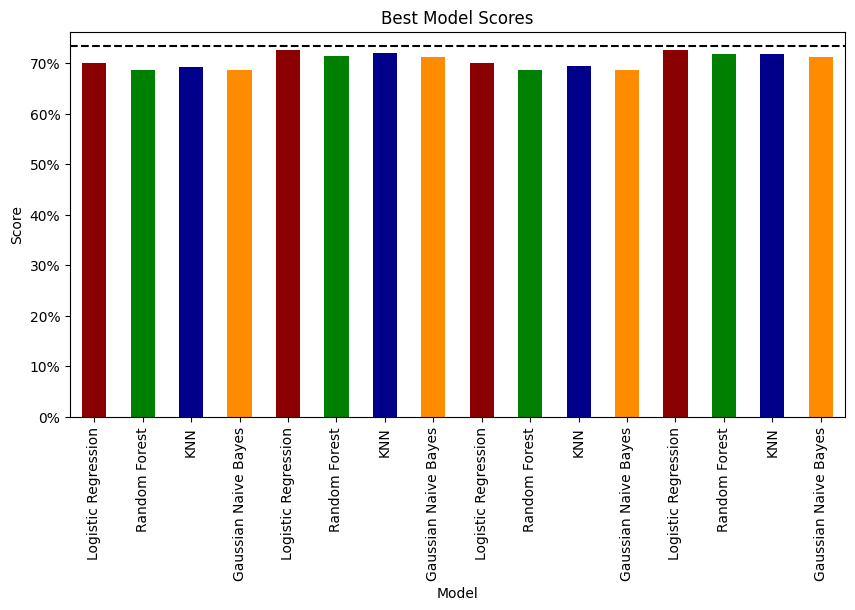

In [597]:
fig = best_models_df["Score"].plot(kind="bar", title="Best Model Scores", figsize=(10, 5), color=["darkred", "green", "darkblue", "darkorange"])
fig.set_xlabel("Model")
fig.set_ylabel("Score")
fig.set_xticklabels(best_models_df["Model"])
# setting y label as percentage
vals = fig.get_yticks()
fig.set_yticklabels(["{:,.0%}".format(x) for x in vals])

# getting horizontal line
hline = fig.axhline(y=0.734372, color="black", linestyle="--")

plt.show();

## Doing the same for Recall score

I would argue that in the context of a serious disease, Recall is the most important metric to consider as it prioritizes predicting a true positive over a false negative. This is crucial to avoid leaving a sick patient undiagnosed.

C:\Users\Agam\AppData\Local\Temp\ipykernel_8092\2587298891.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


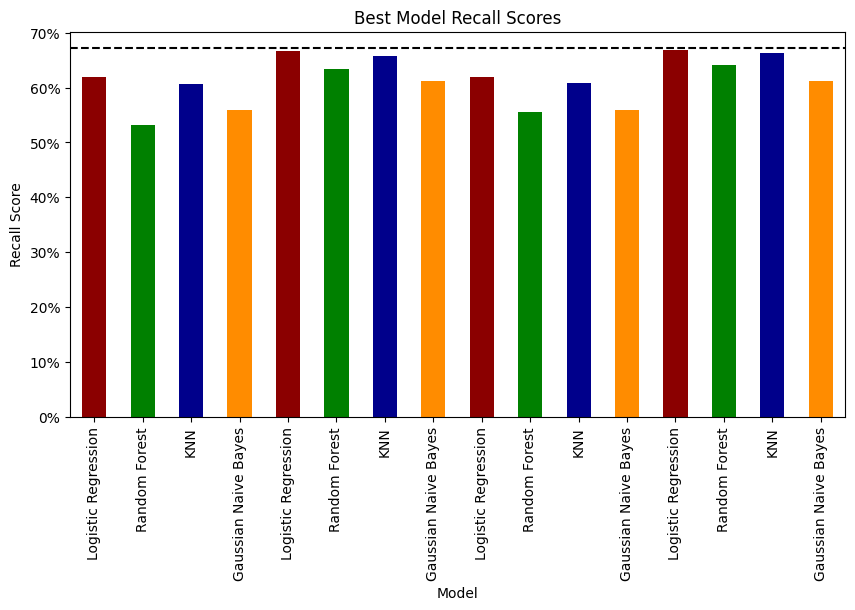

In [598]:
fig = best_models_df["recall_score"].plot(kind="bar", title="Best Model Recall Scores", figsize=(10, 5), color=["darkred", "green", "darkblue", "darkorange"])
fig.set_xlabel("Model")
fig.set_ylabel("Recall Score")
fig.set_xticklabels(best_models_df["Model"])
# setting y label as percentage
vals = fig.get_yticks()
fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# getting horizontal line
hline = fig.axhline(y=0.672574, color="black", linestyle="--")

plt.show()

In [599]:
# Further analysis of the best models

# Checking what models had the best score
print("Best Score: ")
display(best_models_df[best_models_df["Score"] == best_models_df["Score"].max()])
# Checking what models had the best recall score
print("Best Recall Score: ")
display(best_models_df[best_models_df["recall_score"] == best_models_df["recall_score"].max()])
# Checking what models had the best precision score
print("Best Precision Score: ")
display(best_models_df[best_models_df["precision_score"] == best_models_df["precision_score"].max()])
# Checking what models had the best f1 score
print("Best F1 Score: ")
display(best_models_df[best_models_df["accuracy_score"] == best_models_df["accuracy_score"].max()])
# Checking what models had the best accuracy score
print("Best Accuracy Score: ")
display(best_models_df[best_models_df["f1_score"] == best_models_df["f1_score"].max()])


Best Score: 


,Model,Scaler,Score,Parameters,Predictions,Confusion Matrix,accuracy_score,precision_score,recall_score,f1_score
12,Logistic Regression,MinMaxScaler,0.726342,"{'penalty': 'l2', 'solver': 'newton-cg'}","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9132, 2545], [3736, 7539]]",0.726342,0.74762,0.668647,0.705932


Best Recall Score: 


,Model,Scaler,Score,Parameters,Predictions,Confusion Matrix,accuracy_score,precision_score,recall_score,f1_score
12,Logistic Regression,MinMaxScaler,0.726342,"{'penalty': 'l2', 'solver': 'newton-cg'}","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9132, 2545], [3736, 7539]]",0.726342,0.74762,0.668647,0.705932


Best Precision Score: 


,Model,Scaler,Score,Parameters,Predictions,Confusion Matrix,accuracy_score,precision_score,recall_score,f1_score
1,Random Forest,StandardScaler,0.685953,"{'max_depth': 6, 'max_leaf_nodes': 4, 'min_sam...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9742, 1935], [5273, 6002]]",0.685953,0.756205,0.532328,0.624818


Best F1 Score: 


,Model,Scaler,Score,Parameters,Predictions,Confusion Matrix,accuracy_score,precision_score,recall_score,f1_score
12,Logistic Regression,MinMaxScaler,0.726342,"{'penalty': 'l2', 'solver': 'newton-cg'}","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9132, 2545], [3736, 7539]]",0.726342,0.74762,0.668647,0.705932


Best Accuracy Score: 


,Model,Scaler,Score,Parameters,Predictions,Confusion Matrix,accuracy_score,precision_score,recall_score,f1_score
12,Logistic Regression,MinMaxScaler,0.726342,"{'penalty': 'l2', 'solver': 'newton-cg'}","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[9132, 2545], [3736, 7539]]",0.726342,0.74762,0.668647,0.705932


### Best Model with best recall is Log_reg, MinMaxScaler and Parameters: {'penalty': 'none', 'solver': 'newton-cg'}, Dataset 1

## Using VotingClassifier on my models.

[0 1 0 ... 0 0 1]
Ensemble Model
Ensemble Model Score:  0.725775531544092
Ensemble Model Confusion Matrix:  [[9281 2396]
 [3898 7377]]
Ensemble Model Classification Report:                precision    recall  f1-score   support

           0       0.70      0.79      0.75     11677
           1       0.75      0.65      0.70     11275

    accuracy                           0.73     22952
   macro avg       0.73      0.72      0.72     22952
weighted avg       0.73      0.73      0.72     22952



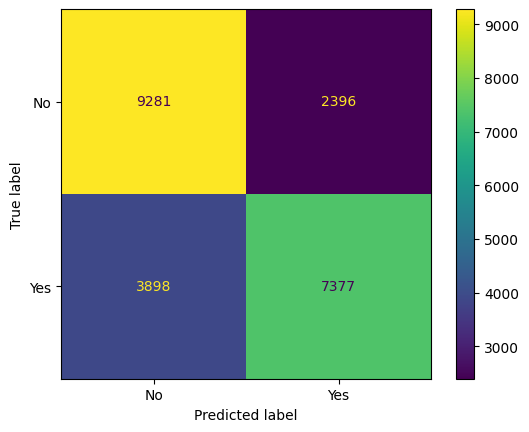

In [600]:
# Using the models with the best parameters with VotingClassifier() to create an ensemble model

log_reg = LogisticRegression(solver="newton-cg")
rf = RandomForestClassifier(max_depth=4, min_samples_split=10, max_leaf_nodes = 4, n_estimators=50)
knn = KNeighborsClassifier(metric = "euclidean", n_neighbors= 20, weights=  "uniform")
gauss_nb = GaussianNB(var_smoothing=1e-09)

voting_clf = VotingClassifier(estimators=[("lr", log_reg), ("rf", rf), ("knn", knn), ("gnb", gauss_nb)], voting = "soft")
voting_clf.fit(X_1_train_scaled, y_1_train)
voting_clf.score(X_1_val_scaled, y_1_val)

# Creating a list of the ensemble model predictions
voting_clf_preds = voting_clf.predict(X_1_val_scaled)
print(voting_clf_preds)

# Creating a list of the ensemble model confusion matrices
voting_clf_confusion_matrices = confusion_matrix(y_1_val, voting_clf_preds)

# Creating a list of the ensemble model classification reports
voting_clf_classification_reports = classification_report(y_1_val, voting_clf_preds)

# Printing the ensemble model
print("Ensemble Model")
print("Ensemble Model Score: ", voting_clf.score(X_1_val_scaled, y_1_val))
print("Ensemble Model Confusion Matrix: ", confusion_matrix(y_1_val, voting_clf_preds))
print("Ensemble Model Classification Report: ", classification_report(y_1_val, voting_clf_preds))

# plotting with ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=voting_clf_confusion_matrices, display_labels=["No", "Yes"])
disp.plot()



## Voting Classifier
- Is better than Logistical Regression when it comes to recall, and is almost the same when it comes to score.

### Creating a new dataset with 100 samples and removing them from the original dataset

In [601]:
# Saving 100 random samples to a csv file
display(df_1.info())
df_1.sample(100).to_csv("test_samples.csv")
# removing the random samples from the dataframe using the index
df_no_samples = df_1.drop(df_1.sample(100).index)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 68513 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68513 non-null  int64  
 1   ap_hi        68513 non-null  int64  
 2   ap_lo        68513 non-null  int64  
 3   cholesterol  68513 non-null  int64  
 4   gluc         68513 non-null  int64  
 5   smoke        68513 non-null  int64  
 6   alco         68513 non-null  int64  
 7   active       68513 non-null  int64  
 8   cardio       68513 non-null  int64  
 9   bmi          68513 non-null  float64
 10  gender_1     68513 non-null  int64  
 11  gender_2     68513 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


None

In [602]:
# creating df with only the random samples
df_test_samples = pd.read_csv("../Data/test_samples.csv", index_col=0)


In [603]:
df_test_samples

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_1,gender_2
55859,43,110,80,1,1,0,0,0,0,22.77,1,0
61241,43,90,60,1,1,0,0,1,0,25.04,1,0
65552,43,120,80,1,1,0,0,0,0,33.13,0,1
67279,64,110,90,1,1,0,0,1,1,29.30,1,0
31911,57,140,80,2,2,0,0,1,1,29.41,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15981,51,120,80,3,3,0,0,1,0,23.88,1,0
40951,49,120,80,1,1,0,0,1,0,22.49,1,0
36236,48,120,80,1,1,0,0,1,0,26.53,0,1
10637,53,140,90,2,1,0,0,1,0,26.11,1,0


## The sample data has been removed from df_no_samples, which ensures that there will be no data leakage.

In [604]:
df_no_samples.value_counts()

age  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  bmi    gender_1  gender_2
50   120    80     1            1     0      0     1       0       23.88  1         0           19
56   120    80     1            1     0      0     1       0       23.88  1         0           14
49   120    80     1            1     0      0     1       0       23.44  1         0           14
58   120    80     1            1     0      0     1       0       23.88  1         0           13
54   120    80     1            1     0      0     1       0       23.88  1         0           13
                                                                                                ..
50   130    90     1            1     0      0     1       0       22.84  1         0            1
                                                                   22.94  1         0            1
                                                                   23.14  1         0            1
                

In [605]:
# Splitting df_no_samples into X and y
X, y = df_no_samples.drop("cardio", axis=1), df_no_samples["cardio"]

# No need to split the data into train and test sets as we will be using the test_samples.csv file to test the model

In [606]:
# Taking the voting classifier from the previous section and fitting it to the training data

voting_clf.fit(X, y) # using the entire dataset to train the model excluding the random samples

# importing pickle to save the model
import pickle

pickle.dump(voting_clf, open("voting_clf.pkl", "wb")) # saving the model as test.pkl

